# Replica project

### Embedding visualization

Showing most similar images for each image based on stored embeddings

In [10]:
# loading the metadata
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm
import sys
import pickle

sys.path.insert(0, "../model/")
from utils import get_scores, make_tree_orig, show_similars


path = '/home/guhennec/scratch/2021_Cini/TopologicalAnalysis_Cini/data/'
data_dir = '/scratch/students/schaerf/'



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
data = pd.read_csv(data_dir + 'dedup_data_sample.csv').drop(columns=['Unnamed: 0', 'level_0'])
print(data.shape)
data.head()

(12862, 47)


,uid,cluster,index,Drawer,ImageNumber,Author,Description,AuthorOriginal,AuthorULANLabel,AuthorULAN,...,CardboardURL,ImageURL,uid_connection,img1,img2,type,annotated,uid2,set,path
0,f2c17f970b114294a0403d5d4e59386f,f2c17f970b114294a0403d5d4e59386f,111077,74A,745,MITSUOKI Tosa,"Episodio del ""Genji Monogatari"" Dis.","MITSUOKI, Tosa","Mitsuoki, Tosa",ulan:500121170,...,https://dhlabsrv4.epfl.ch/iiif_cini/74A%2F74A_...,https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...,Not uid connection,NaN,NaN,NaN,NaN,74A/74A_745.jpg,NaN,74A/74A_745.jpg
1,e165258d8e6142acac6d5617cc091b8a,e165258d8e6142acac6d5617cc091b8a,103106,114B,739,SORIA Giovanni Battista,Atrio.,"SORIA, Giovanni Battista","Soria, Giovanni Battista",ulan:500020294,...,https://dhlabsrv4.epfl.ch/iiif_cini/114B%2F114...,https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...,Not uid connection,NaN,NaN,NaN,NaN,114B/114B_739.jpg,NaN,114B/114B_739.jpg
2,a266c68d59454209a9c0c3ec0e9bf99d,a266c68d59454209a9c0c3ec0e9bf99d,74427,39A,269,EVERDINGEN Allaert van,Paesaggio ecoa earri penna e pennello se 193 mm,EVERDINGEN Allaert van,"Everdingen, Allaert van",ulan:500115159,...,https://dhlabsrv4.epfl.ch/iiif_cini/39A%2F39A_...,https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...,Not uid connection,NaN,NaN,NaN,NaN,39A/39A_269.jpg,NaN,39A/39A_269.jpg
3,4a617aa8a9cd4d89874221e2beec9931,4a617aa8a9cd4d89874221e2beec9931,34405,89A,468,SEC XVI,Leonendi San Marco.,SEC. XVI,NaN,NaN,...,https://dhlabsrv4.epfl.ch/iiif_cini/89A%2F89A_...,https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...,Not uid connection,NaN,NaN,NaN,NaN,89A/89A_468.jpg,NaN,89A/89A_468.jpg
4,bba4f0d0294f420b90310cfe333c03ad,bba4f0d0294f420b90310cfe333c03ad,85957,84B,729,SEC XVI ex,Cherubino.,SEC. XVI ex,NaN,NaN,...,https://dhlabsrv4.epfl.ch/iiif_cini/84B%2F84B_...,https://dhlabsrv4.epfl.ch/iiif_replica/cini%2F...,Not uid connection,NaN,NaN,NaN,NaN,84B/84B_729.jpg,NaN,84B/84B_729.jpg


In [12]:
train_test = data[data["set"].notnull()].reset_index() #[data['img1'].isin(list_downloaded)][data['img2'].isin(list_downloaded)]
print(train_test.shape)


(2862, 48)


In [13]:
embeddings = np.load(
                    #data_dir + 'resnext-101_avg_480' + ".npy",
                    data_dir + 'embeddings/resnext-101_epoch_314-04-2022_23:25:29.npy',
                    allow_pickle=True,
                )        
                

In [14]:
scores = get_scores(embeddings, train_test, data)

100%|██████████| 2862/2862 [00:30<00:00, 92.59it/s] 


all positions 250.5110701107011
min positions 85.26111908177906
median positions 277.08177905308463
mean average precision 0.2746733085124251
recall @ 400 0.7015256821928271
recall @ 200 0.6340753499648765
recall @ 100 0.588408546658188
recall @ 50 0.5208427711297151
recall @ 20 0.4382750598675993


In [15]:
tree, reverse_map = make_tree_orig(embeddings, reverse_map=True)

In [16]:
with open(data_dir + 'uid2path.pkl', 'rb') as outfile:
        uid2path = pickle.load(outfile)


positions of matches [0, 48, 50, 50, 50, 50, 50]


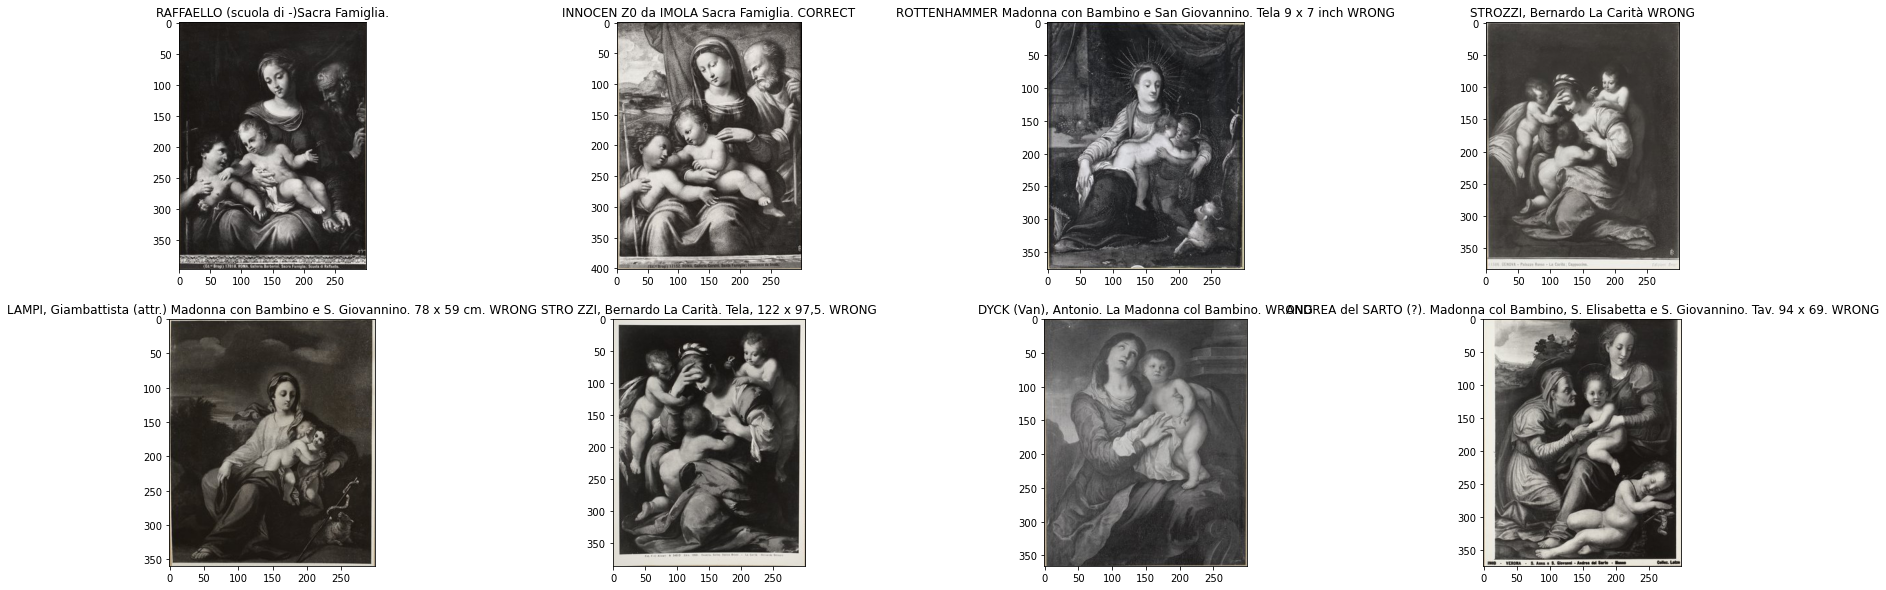

(10, 10, 2048)


100%|██████████| 50/50 [00:45<00:00,  1.10it/s]


In [29]:
show_similars(train_test[train_test['set'] == 'test'].sample(), embeddings, train_test, tree, reverse_map, uid2path, data)